# 🏥 CDC Diabetes Classification - Part 1: Data Understanding

**Dataset:** CDC BRFSS 2015 Diabetes Health Indicators  
**Goal:** Understand the data, check quality, identify issues

---

In [1]:
# Basic imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Settings
pd.set_option('display.max_columns', None)
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("Set2")

# Random seed
np.random.seed(42)

print("✅ Imports complete")

✅ Imports complete


In [2]:
# Load dataset
df = pd.read_csv('C:\\Users\\yaros\\Desktop\\python\\faidm\\individual_project\\diabetes-classification-ml\\data\\CDC Diabetes Dataset.csv')

print(f"Dataset shape: {df.shape}")
print(f"Rows: {df.shape[0]:,}")
print(f"Columns: {df.shape[1]}")

# Show first few rows
df.head()

Dataset shape: (253680, 22)
Rows: 253,680
Columns: 22


,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [6]:
# Set max display options
pd.set_option('display.max_columns', None)  # Shows all columns
pd.set_option('display.max_rows', None)     # Shows all rows
pd.set_option('display.width', 1000)        # Prevents line wrapping

In [7]:
# Basic info
print("=== Dataset Info ===")
df.info(verbose=True, show_counts=True)

print("\n=== Summary Statistics ===")
# 'include="all"' forces pandas to show statistics for every column
print(df.describe(include='all'))

=== Dataset Info ===
<class 'pandas.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  flo

In [8]:
# 1. Missing values?
print("Missing values:")
print(df.isnull().sum())

# 2. Duplicates?
print(f"\nDuplicates: {df.duplicated().sum()}")

# 3. Data types
print("\nData types:")
print(df.dtypes.value_counts())

Missing values:
Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

Duplicates: 23899

Data types:
float64    22
Name: count, dtype: int64


Target distribution:
Diabetes_012
0.0    213703
1.0      4631
2.0     35346
Name: count, dtype: int64


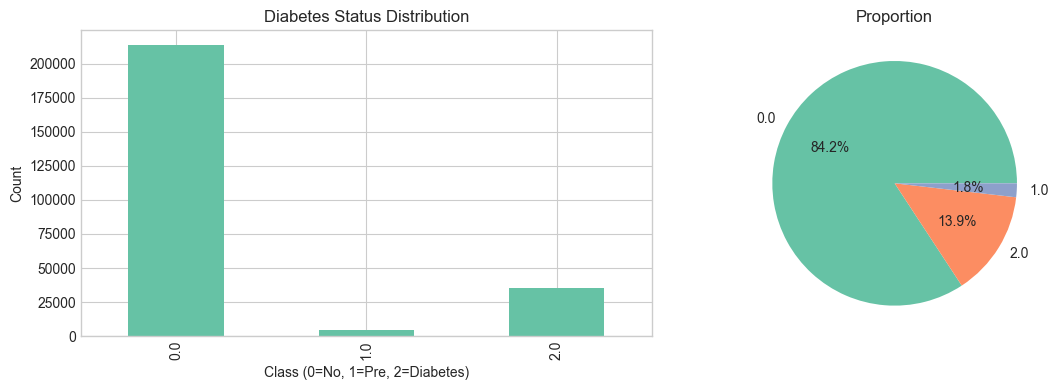

Class 0.0: 213,703 (84.2%)
Class 1.0: 4,631 (1.8%)
Class 2.0: 35,346 (13.9%)


In [9]:
# Target distribution
target_col = 'Diabetes_012'

print("Target distribution:")
print(df[target_col].value_counts().sort_index())

# Plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Bar chart
df[target_col].value_counts().sort_index().plot(kind='bar', ax=ax1)
ax1.set_title('Diabetes Status Distribution')
ax1.set_xlabel('Class (0=No, 1=Pre, 2=Diabetes)')
ax1.set_ylabel('Count')

# Pie chart
df[target_col].value_counts().plot(kind='pie', ax=ax2, autopct='%1.1f%%')
ax2.set_ylabel('')
ax2.set_title('Proportion')

plt.tight_layout()
plt.show()

# Calculate percentages
counts = df[target_col].value_counts().sort_index()
for i, count in counts.items():
    pct = count / len(df) * 100
    print(f"Class {i}: {count:,} ({pct:.1f}%)")

In [10]:
# Features that might be consequences of diabetes (not causes)
potentially_leaky = ['DiffWalk', 'GenHlth']

print("Checking potentially leaky features:")
print("="*50)

for feature in potentially_leaky:
    print(f"\n{feature}:")
    
    # How does it vary by diabetes status?
    ct = pd.crosstab(df[feature], df[target_col], normalize='columns') * 100
    print(ct.round(1))
    
    # Correlation
    corr = df[[feature, target_col]].corr().iloc[0,1]
    print(f"Correlation with target: {corr:.3f}")

Checking potentially leaky features:

DiffWalk:
Diabetes_012   0.0   1.0   2.0
DiffWalk                      
0.0           86.8  72.3  62.9
1.0           13.2  27.7  37.1
Correlation with target: 0.224

GenHlth:
Diabetes_012   0.0   1.0   2.0
GenHlth                       
1.0           20.5   6.8   3.2
2.0           38.1  26.2  18.1
3.0           28.3  37.3  38.1
4.0            9.7  22.1  27.7
5.0            3.3   7.6  13.0
Correlation with target: 0.303


## 🔍 Target Leakage Assessment

**DiffWalk (Difficulty Walking):**
- Could be consequence of diabetes (neuropathy)
- But also independent mobility issue
- **Decision:** Keep for now, test with/without later

**GenHlth (General Health):**
- Self-reported, could be influenced by diagnosis
- But standard in health surveys
- **Decision:** Keep for now

**Action:** We'll create two datasets:
1. Full dataset (all features)
2. Clean dataset (without potentially leaky features)

Then compare model performance on both.

In [11]:
# Save clean version for next step
print("Dataset ready for preprocessing!")
print(f"Shape: {df.shape}")
print(f"No missing values: {df.isnull().sum().sum() == 0}")
print(f"No duplicates: {df.duplicated().sum() == 0}")

# We'll continue in the next notebook

Dataset ready for preprocessing!
Shape: (253680, 22)
No missing values: True
No duplicates: False
